<a href="https://colab.research.google.com/github/manoharpavuluri/dl-cnn-flowerclassification/blob/main/dl_cnn_flowerclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # if you want to see image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# below we will use get_file function which takes following arguemens. flower_photos is the directory where the photos will be stored. cache_dir,
#     is where flower_photos needs to be stored, '.' specifying same directory as where this python file is.
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 6s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
# lets see if it has jpg files
list(data_dir.glob('*/*.jpg'))

AttributeError: 'str' object has no attribute 'glob'

In [6]:
# in order to see and play with the files in the directory, we need to import pathlib library
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
from prettytable import PrettyTable

def get_folder_extension_counts(directory):
    folder_extension_counts = {}

    for root, dirs, files in os.walk(directory):
        folder_name = os.path.basename(root)
        folder_extension_counts[folder_name] = {'extensions': set(), 'counts': {}}

        for file in files:
            _, extension = os.path.splitext(file)
            extension = extension.lower()  # Convert to lowercase for case-insensitive comparison

            # Update the counts and extensions for the current folder
            folder_extension_counts[folder_name]['extensions'].add(extension)
            folder_extension_counts[folder_name]['counts'][extension] = folder_extension_counts[folder_name]['counts'].get(extension, 0) + 1

    return folder_extension_counts

def display_table(folder_extension_counts):
    table = PrettyTable()
    table.field_names = ["Subfolder Name", "Extension", "Count of Files"]

    for folder, data in folder_extension_counts.items():
        for extension, count in data['counts'].items():
            table.add_row([folder, extension, count])

    print(table)

# Example usage:
directory_path = 'datasets/flower_photos'
folder_extension_counts = get_folder_extension_counts(directory_path)

display_table(folder_extension_counts)


+----------------+-----------+----------------+
| Subfolder Name | Extension | Count of Files |
+----------------+-----------+----------------+
| flower_photos  |    .txt   |       1        |
|     roses      |    .jpg   |      641       |
|   sunflowers   |    .jpg   |      699       |
|     daisy      |    .jpg   |      633       |
|   dandelion    |    .jpg   |      898       |
|     tulips     |    .jpg   |      799       |
+----------------+-----------+----------------+


In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2059172936_032ffc12aa.jpg'),
 PosixPath('datasets/flower_photos/roses/18376177250_86060cbdc9.jpg'),
 PosixPath('datasets/flower_photos/roses/4575042086_7674b76297_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14687731322_5613f76353.jpg')]

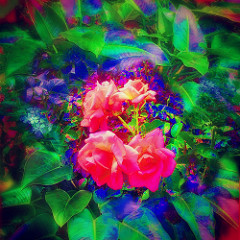

In [10]:
#if you want to see a image, use PIL lib

PIL.Image.open(str(roses[5]))



In [35]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'daisy' : list(data_dir.glob('daisy/*'))
}

In [36]:
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/2059172936_032ffc12aa.jpg'),
 PosixPath('datasets/flower_photos/roses/18376177250_86060cbdc9.jpg'),
 PosixPath('datasets/flower_photos/roses/4575042086_7674b76297_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8388497874_1fe750cc95_m.jpg'),
 PosixPath('datasets/flower_photos/roses/14687731322_5613f76353.jpg'),
 PosixPath('datasets/flower_photos/roses/8036594516_69a7da5f73_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3292654244_4a220ab96f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3208417632_19138d8e35_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5526964611_76ef13025c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4553266758_09d4dbdac9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3526860692_4c551191b1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4360743371_6238b36d8c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/22982871191_ec61e36939_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jp

In [37]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [38]:
img = cv2.imread(flower_image_dict['roses'])

TypeError: Can't convert object to 'str' for 'filename'

In [40]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img


array([[[ 38, 127, 201],
        [ 34, 128, 201],
        [ 40, 124, 206],
        ...,
        [ 39, 252, 233],
        [ 35, 253, 236],
        [ 33, 253, 237]],

       [[ 43, 135, 206],
        [ 36, 131, 200],
        [ 31, 119, 196],
        ...,
        [ 46, 253, 238],
        [ 41, 254, 238],
        [ 37, 254, 239]],

       [[ 30, 125, 198],
        [ 40, 134, 207],
        [ 39, 124, 204],
        ...,
        [ 39, 252, 237],
        [ 38, 254, 237],
        [ 38, 254, 237]],

       ...,

       [[ 67,  62, 117],
        [ 82,  67, 129],
        [ 83,  56, 129],
        ...,
        [ 53,  63, 127],
        [ 54,  70, 129],
        [ 55,  67, 125]],

       [[ 73,  64, 121],
        [ 83,  62, 131],
        [ 79,  59, 132],
        ...,
        [ 49,  73, 133],
        [ 47,  69, 127],
        [ 45,  68, 124]],

       [[ 71,  62, 118],
        [ 82,  61, 129],
        [ 79,  59, 132],
        ...,
        [ 56,  65, 128],
        [ 52,  62, 122],
        [ 53,  61, 120]]

In [41]:
img.shape

(378, 500, 3)

In [42]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [43]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [44]:
X = np.array(X)
y = np.array(y)

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [46]:
len(X_train)

2752

In [47]:
len(X_test)

918

In [48]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [49]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 8s 22ms/step - loss: 1.3777 - accuracy: 0.4182
Epoch 2/30
86/86 [==============================] - 2s 22ms/step - loss: 0.9351 - accuracy: 0.6424
Epoch 3/30
86/86 [==============================] - 2s 20ms/step - loss: 0.7158 - accuracy: 0.7384
Epoch 4/30
86/86 [==============================] - 2s 20ms/step - loss: 0.5088 - accuracy: 0.8176
Epoch 5/30
86/86 [==============================] - 2s 20ms/step - loss: 0.3035 - accuracy: 0.9055
Epoch 6/30
86/86 [==============================] - 2s 20ms/step - loss: 0.1454 - accuracy: 0.9528
Epoch 7/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0858 - accuracy: 0.9771
Epoch 8/30
86/86 [==============================] - 2s 22ms/step - loss: 0.0603 - accuracy: 0.9829
Epoch 9/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0516 - accuracy: 0.9855
Epoch 10/30
86/86 [==============================] - 2s 20ms/step - loss: 0.0455 - accuracy: 0.9895
Epoch 11/

In [50]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 1s 22ms/step - loss: 2.7883 - accuracy: 0.6492


[2.7883212566375732, 0.6492374539375305]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

